In [ ]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

In [ ]:
data_parent = '/media/shailendra/New Volume/Master_Data_Science_Oslo_met/ACIT4620/project/archive/AdienceBenchmarkGenderAndAgeClassification'
print(os.listdir(data_parent))

['AdienceBenchmarkGenderAndAgeClassification', 'faces', 'fold_0_data.txt', 'fold_1_data.txt', 'fold_2_data.txt', 'fold_3_data.txt', 'fold_4_data.txt', '__MACOSX']


In [ ]:

fold_0 = pd.read_csv(os.path.join(data_parent, 'fold_0_data.txt'), sep='\t')
fold_1 = pd.read_csv(os.path.join(data_parent, 'fold_1_data.txt'),sep='\t')
fold_2 = pd.read_csv(os.path.join(data_parent, 'fold_2_data.txt'),sep='\t')
fold_3 = pd.read_csv(os.path.join(data_parent, 'fold_3_data.txt'),sep='\t')
fold_4 = pd.read_csv(os.path.join(data_parent, 'fold_4_data.txt'),sep='\t')
total_data = pd.concat([fold_0, fold_1, fold_2, fold_3, fold_4], ignore_index=True)
total_data.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


In [ ]:
print('[+] length of the file:', len(total_data))
print('[+] unique values of Age:')
print(total_data.age.unique())
print('===================================================')
print('[+] Number of None Values in Age:')
print((total_data.age == 'None').sum())
print('[+] unique values of Gender:')
print(total_data.gender.unique())
print('===================================================')
print('[+] Number of nan values in Gender:')
print(total_data.gender.isna().sum())

[+] length of the file: 19370
[+] unique values of Age:
['(25, 32)' '(38, 43)' '(4, 6)' '(60, 100)' '(15, 20)' '(48, 53)'
 '(8, 12)' '(0, 2)' 'None' '(38, 48)' '35' '3' '55' '58' '22' '13' '45'
 '36' '23' '(38, 42)' '(8, 23)' '(27, 32)' '57' '56' '2' '29' '34' '42'
 '46' '32']
[+] Number of None Values in Age:
748
[+] unique values of Gender:
['f' 'm' nan 'u']
[+] Number of nan values in Gender:
779


# Gender chart

<AxesSubplot:ylabel='gender'>

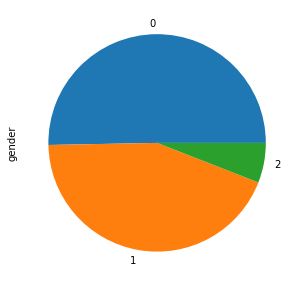

In [ ]:
total_data.groupby('gender')['gender'].count().plot.pie(figsize=(10, 5))

<AxesSubplot:ylabel='age'>

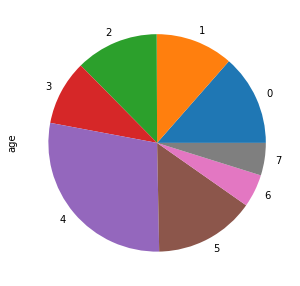

In [ ]:
total_data.groupby('age')['age'].count().plot.pie(figsize=(10, 5))

[+] Image path: /media/shailendra/New Volume/Master_Data_Science_Oslo_met/ACIT4620/project/archive/AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.1.10399863183_a04f4c26a1_o.jpg
[+] Image shape: (600, 600, 3)
[!] Age: (25, 32) Gender: f


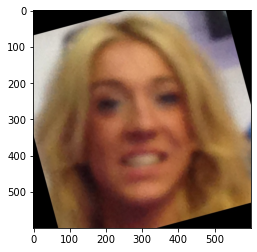

In [ ]:
sample_num = 200
im_name = total_data.iloc[sample_num].original_image
im_path = os.path.join(data_parent, 'faces',str(total_data.iloc[sample_num].user_id), 'coarse_tilt_aligned_face.' + str(total_data.iloc[sample_num].face_id) + '.' + im_name)
print('[+] Image path:', im_path)
image = cv2.imread(im_path)
print('[+] Image shape:', image.shape)
print('[!] Age:', total_data.iloc[sample_num].age, 'Gender:', total_data.iloc[sample_num].gender)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

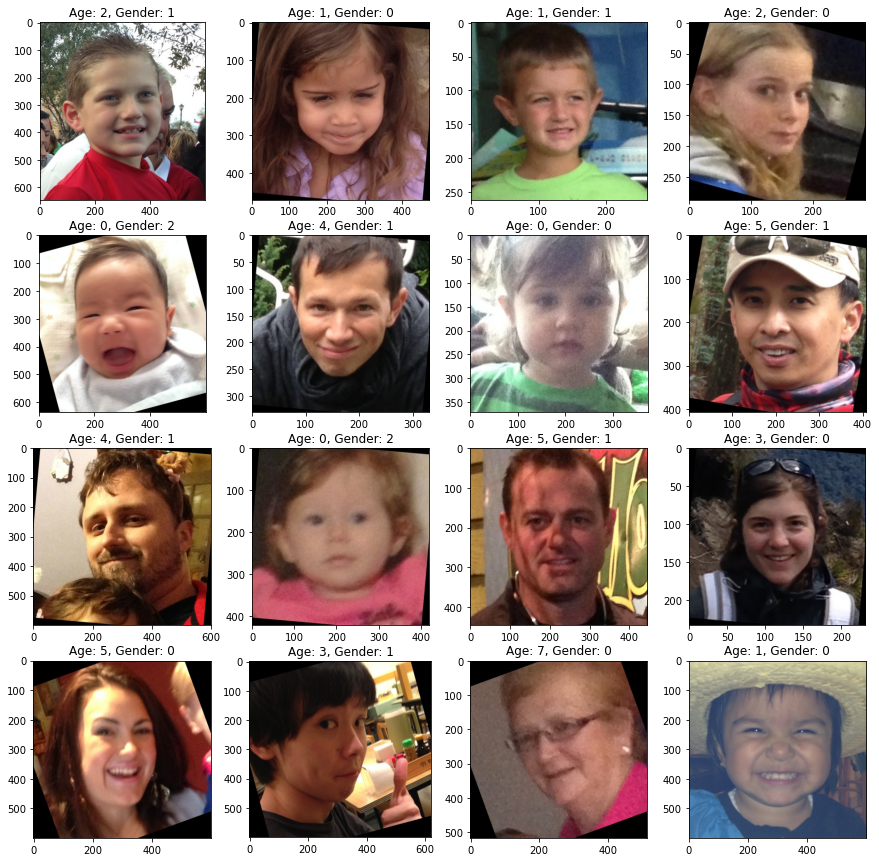

In [ ]:
images = []
for _ in range(16):
    sample_num = random.randint(0, len(total_data))
    im_name = total_data.iloc[sample_num].original_image
    im_path = os.path.join(data_parent, 'faces',str(total_data.iloc[sample_num].user_id), 'coarse_tilt_aligned_face.' + str(total_data.iloc[sample_num].face_id) + '.' + im_name)
    image = cv2.imread(im_path)
    age = total_data.iloc[sample_num].age
    gender = total_data.iloc[sample_num].gender
    n_col = 4
    n_rows = 4
    images.append((image, age, gender))
    
fig, axs = plt.subplots(ncols=n_col, nrows=n_rows, figsize=(15,15))
count = 0
for i in range(n_rows):
      for j in range(n_col):
        axs[i][j].imshow(cv2.cvtColor(images[count][0], cv2.COLOR_BGR2RGB))
        axs[i][j].set_title(f'Age: {images[count][1]}, Gender: {images[count][2]}')
        count+=1
plt.show()

In [ ]:
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]
age_mapping_dict = {each[0]: each[1] for each in age_mapping}

drop_labels = []
for idx, each in enumerate(total_data.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        total_data.age.loc[idx] = age_mapping_dict[each]
total_data = total_data.drop(labels=drop_labels, axis=0) #droped None values
total_data.age.value_counts(dropna=False)

/home/shailendra/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


25-32    5296
38-43    2776
0-2      2509
8-13     2292
4-6      2140
15-20    1792
48-53     916
60+       901
Name: age, dtype: int64

In [ ]:
total_data = total_data.dropna()
total_data['full_path'] = total_data.apply(lambda x: os.path.join(data_parent, 'faces', str(x.user_id), 'coarse_tilt_aligned_face.' + str(x.face_id) + '.' + x.original_image), axis=1)
total_data.age.unique(), len(total_data.age.unique()), total_data.gender.unique()

(array(['25-32', '38-43', '4-6', '60+', '15-20', '48-53', '8-13', '0-2'],
       dtype=object),
 8,
 array(['f', 'm', 'u'], dtype=object))

# Change age and gender mapping

In [ ]:

gender_map = {'f':0, 
             'm':1,
             'u':2}
age_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}
total_data.gender = total_data.gender.replace(gender_map)
total_data.age=total_data.age.replace(age_map)

In [ ]:
gender_labels = total_data.gender.values.tolist()
age_labels= total_data.age.values.tolist()
train_paths = total_data.full_path.values.tolist()
len(gender_labels), gender_labels[0],len(age_labels),age_labels[0], train_paths[0]

(18551,
 0,
 18551,
 4,
 '/media/shailendra/New Volume/Master_Data_Science_Oslo_met/ACIT4620/project/archive/AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.1.10399646885_67c7d20df9_o.jpg')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
shuffle_list = list(zip(train_paths, gender_labels,age_labels))
shuffle_list = random.sample(shuffle_list, len(train_paths))
train_paths, gender_labels,age_labels = zip(*shuffle_list)
age_labels = np.array(list(age_labels)).reshape((-1, 1))
enc= OneHotEncoder()
age_labels = enc.fit_transform(age_labels).toarray() 

In [ ]:
train_split = 0.75
train_sample = int(train_split * len(total_data))

train_data = train_paths[:train_sample]
validation_data = train_paths[train_sample:]

train_labels_gender = gender_labels[:train_sample]
validation_labels_gender = gender_labels[train_sample:]

train_labels_age=age_labels[:train_sample]
validation_labels_age=age_labels[train_sample:]
print("train data count:")
len(train_data), len(train_labels_gender), len(train_labels_age)
# print("validation data count:")
# len(validation_data), len(validation_labels)

train data count:


(13913, 13913, 13913)

In [ ]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import multiprocessing

2021-11-12 19:20:47.896466: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shailendra/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/cv2/../../lib64:/home/shailendra/rsoftware/root/lib/:/home/shailendra/rsoftware/root/lib:/home/shailendra/CLHEP/2.4.1.0-install/lib/:/home/shailendra/geant4/geant4.10.05.p01-build/BuildProducts/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib:/usr/lib/x86_64-linux-gnu/usr/lib:/usr/local/lib:/Applications/autotools/lib:/home/shailendra/CLHEP/2.4.1.0-install/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib:/home/shailendra/rsoftware/root/lib:/usr/local/lib:/usr/lib:/home/shailendra/anaroot/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib
2021-11-12 19:20:47.896550: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [ ]:
# train_dataset = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_gender),list(train_labels_age)))
# validation_dataset = tf.data.Dataset.from_tensor_slices((list(validation_data), list(validation_labels_gender),list(validation_labels_age)))
train_dataset = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_age)))
validation_dataset = tf.data.Dataset.from_tensor_slices((list(validation_data),list(validation_labels_age)))

2021-11-12 18:45:53.070816: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shailendra/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/cv2/../../lib64:/home/shailendra/rsoftware/root/lib/:/home/shailendra/rsoftware/root/lib:/home/shailendra/CLHEP/2.4.1.0-install/lib/:/home/shailendra/geant4/geant4.10.05.p01-build/BuildProducts/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib:/usr/lib/x86_64-linux-gnu/usr/lib:/usr/local/lib:/Applications/autotools/lib:/home/shailendra/CLHEP/2.4.1.0-install/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib:/home/shailendra/rsoftware/root/lib:/usr/local/lib:/usr/lib:/home/shailendra/anaroot/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib
2021-11-12 18:45:53.070866: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)

In [ ]:
# for path, target1,target2 in train_dataset.take(1):
#     print(path, target1,target2)
for path, target1 in train_dataset.take(1):
    print(path, target1)

tf.Tensor(b'/media/shailendra/New Volume/Master_Data_Science_Oslo_met/ACIT4620/project/archive/AdienceBenchmarkGenderAndAgeClassification/faces/39411334@N02/coarse_tilt_aligned_face.413.11042710625_77f465d79c_o.jpg', shape=(), dtype=string) tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0.], shape=(8,), dtype=float64)


In [ ]:
# def preprocess_func(path, label_gender,label_age):
#     image = tf.io.read_file(path)
#     image = tf.image.decode_jpeg(image, channels=3)
#     image = tf.image.resize(image, [128, 128]) / 255.0
        
#     return image, label_gender, label_age

def preprocess_func(path, label_age):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128]) / 255.0
        
    return image, label_age

In [ ]:
import multiprocessing

In [ ]:
train_batches = train_dataset.shuffle(500).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(16).prefetch(tf.data.experimental.AUTOTUNE)
validation_batches = validation_dataset.shuffle(500).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(16).prefetch(tf.data.experimental.AUTOTUNE)

2021-11-12 18:46:08.727802: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(16, 128, 128, 3) (16, 8)
tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0.], shape=(8,), dtype=float64)


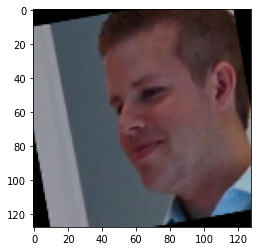

2021-11-12 18:46:09.790850: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [ ]:
# for image, target1,target2 in train_batches.take(1):
#     print(image.shape, target1.shape,target2.shape)
#     image = tf.squeeze(image[0])
#     print(target1[0])
#     print(target2[0])
#     plt.imshow(image)
#     plt.show()
#     break

for image, target1 in train_batches.take(1):
    print(image.shape, target1.shape)
    image = tf.squeeze(image[0])
    print(target1[0])

    plt.imshow(image)
    plt.show()
    break

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, 3, padding='same', strides=2, activation='relu', input_shape=(128, 128, 3)),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.35),
    
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.45),
    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation = 'softmax')
])

model.compile(optimizer='adam', loss= tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

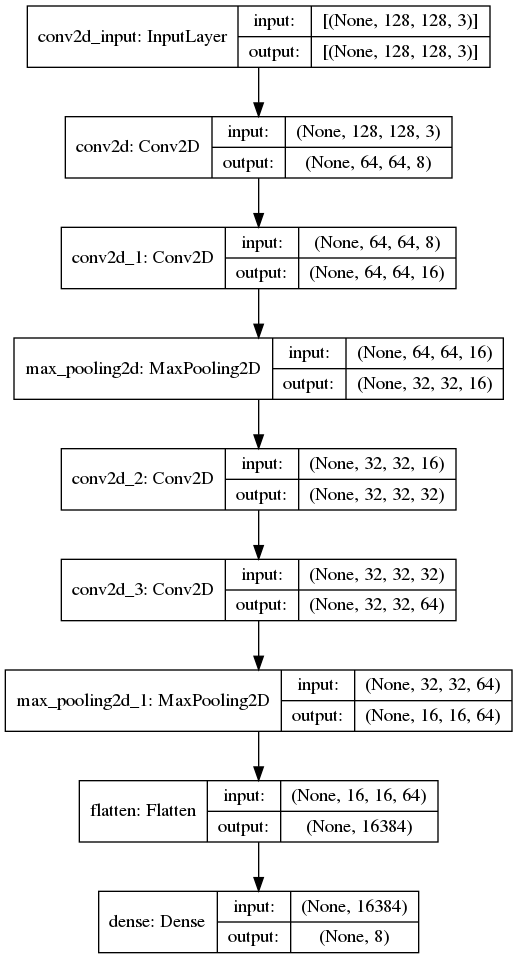

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Age classification (training with results)

In [ ]:
 history = model.fit(train_batches, epochs=10, validation_data = validation_batches)

Epoch 1/10
870/870 [==============================] - 466s 535ms/step - loss: 1.6328 - accuracy: 0.3945 - val_loss: 1.4361 - val_accuracy: 0.4474
Epoch 2/10
870/870 [==============================] - 65s 75ms/step - loss: 1.2874 - accuracy: 0.5156 - val_loss: 1.3134 - val_accuracy: 0.5073
Epoch 3/10
870/870 [==============================] - 66s 76ms/step - loss: 1.0529 - accuracy: 0.6107 - val_loss: 1.3239 - val_accuracy: 0.5282
Epoch 4/10
870/870 [==============================] - 66s 76ms/step - loss: 0.8390 - accuracy: 0.6938 - val_loss: 1.3972 - val_accuracy: 0.5278
Epoch 5/10
870/870 [==============================] - 67s 76ms/step - loss: 0.6561 - accuracy: 0.7677 - val_loss: 1.5611 - val_accuracy: 0.5347
Epoch 6/10
870/870 [==============================] - 66s 76ms/step - loss: 0.5046 - accuracy: 0.8200 - val_loss: 1.7815 - val_accuracy: 0.5272
Epoch 7/10
870/870 [==============================] - 66s 76ms/step - loss: 0.3995 - accuracy: 0.8548 - val_loss: 1.9457 - val_accurac

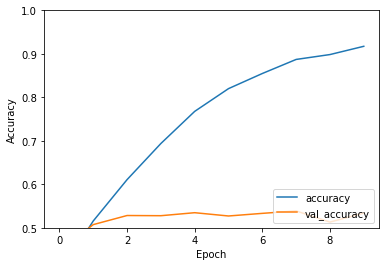

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

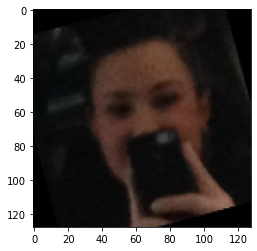

In [ ]:
image_path = validation_data[7]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (128, 128)) / 255.0
plt.imshow(image)
plt.show()

In [ ]:
image = np.expand_dims(image, 0)
prediction = model.predict(image)

In [ ]:
index = np.argmax(prediction)
decoding = {0:'0-2', 1:'4-6', 2:'8-13',3:'15-20',4:'25-32',5:'38-43',6:'48-53',7:'60+'}

print('[+] prediction is :', decoding[index]) 
# print(validation_data[7].age_labels)

[+] prediction is : 0-2


# Gender Classification with results

In [ ]:
train_dataset2 = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_gender)))
validation_dataset2 = tf.data.Dataset.from_tensor_slices((list(validation_data),list(validation_labels_gender)))

2021-11-12 19:21:08.207328: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shailendra/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/cv2/../../lib64:/home/shailendra/rsoftware/root/lib/:/home/shailendra/rsoftware/root/lib:/home/shailendra/CLHEP/2.4.1.0-install/lib/:/home/shailendra/geant4/geant4.10.05.p01-build/BuildProducts/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib:/usr/lib/x86_64-linux-gnu/usr/lib:/usr/local/lib:/Applications/autotools/lib:/home/shailendra/CLHEP/2.4.1.0-install/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib:/home/shailendra/rsoftware/root/lib:/usr/local/lib:/usr/lib:/home/shailendra/anaroot/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib
2021-11-12 19:21:08.207357: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)

In [ ]:
for path, target1 in train_dataset2.take(1):
    print(path, target1)

tf.Tensor(b'/media/shailendra/New Volume/Master_Data_Science_Oslo_met/ACIT4620/project/archive/AdienceBenchmarkGenderAndAgeClassification/faces/115021413@N07/coarse_tilt_aligned_face.952.12058497945_5de40c55e1_o.jpg', shape=(), dtype=string) tf.Tensor(0, shape=(), dtype=int32)


In [ ]:
def preprocess_func(path, label_gender):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128]) / 255.0
        
    return image, label_gender

In [ ]:
train_batches2 = train_dataset2.shuffle(1000).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(16).prefetch(tf.data.experimental.AUTOTUNE)
validation_batches2 = validation_dataset2.shuffle(1000).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(16).prefetch(tf.data.experimental.AUTOTUNE)

(16, 128, 128, 3) (16,)
tf.Tensor(2, shape=(), dtype=int32)


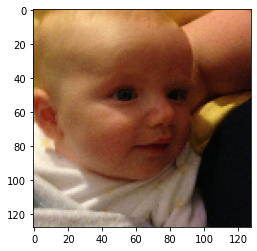

In [ ]:
for image, target1 in train_batches2.take(1):
    print(image.shape, target1.shape)
    image = tf.squeeze(image[0])
    print(target1[0])

    plt.imshow(image)
    plt.show()
    break

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, 3, padding='same', strides=2, activation='relu', input_shape=(128, 128, 3)),
#     tf.keras.layers.MaxPooling2D(),
#      tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#      tf.keras.layers.Dropout(0.45),
    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.4),
    
     tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
      tf.keras.layers.Conv2D(258, 3, padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.5), 
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'softmax')
])

model.compile(optimizer='adam', loss= tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0

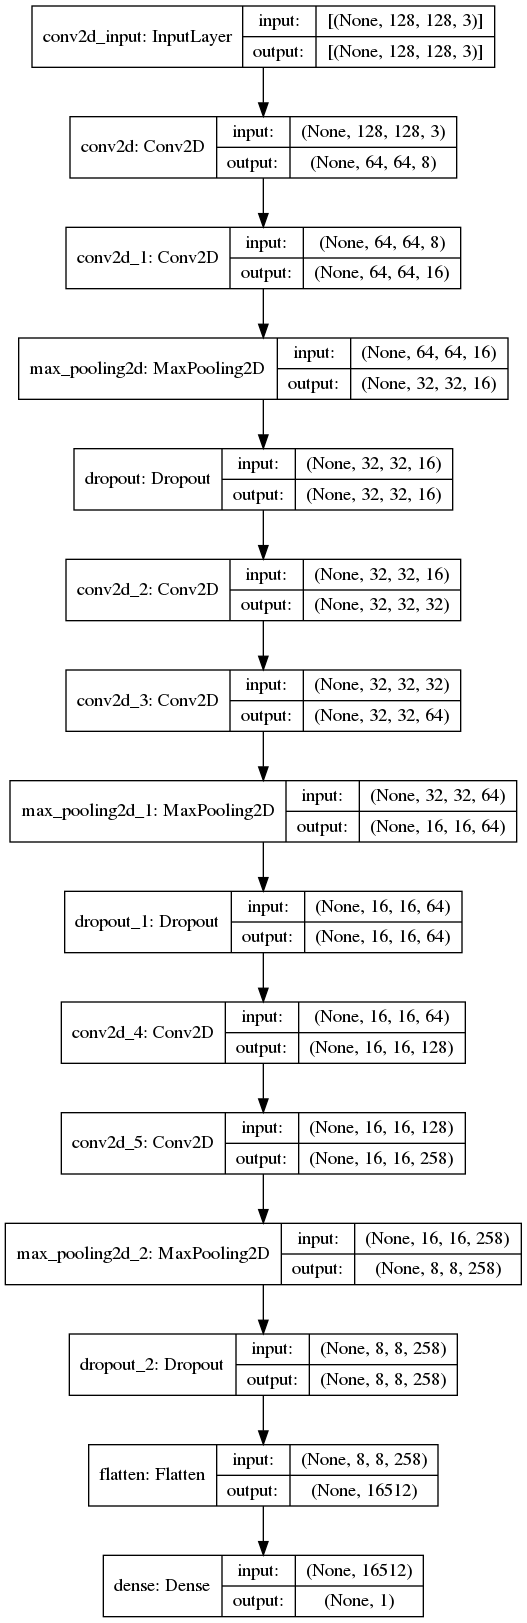

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
 history = model.fit(train_batches2, epochs=10, validation_data = validation_batches2)

2021-11-12 19:21:17.464887: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
870/870 [==============================] - 381s 437ms/step - loss: 0.0000e+00 - accuracy: 0.4361 - val_loss: 0.0000e+00 - val_accuracy: 0.4426
Epoch 2/10
870/870 [==============================] - 125s 143ms/step - loss: 0.0000e+00 - accuracy: 0.4361 - val_loss: 0.0000e+00 - val_accuracy: 0.4426
Epoch 3/10
870/870 [==============================] - 118s 136ms/step - loss: nan - accuracy: 0.4999 - val_loss: nan - val_accuracy: 0.4991
Epoch 4/10
870/870 [==============================] - 118s 136ms/step - loss: nan - accuracy: 0.5043 - val_loss: nan - val_accuracy: 0.4991
Epoch 5/10
870/870 [==============================] - 118s 136ms/step - loss: nan - accuracy: 0.5043 - val_loss: nan - val_accuracy: 0.4991
Epoch 6/10
870/870 [==============================] - 119s 137ms/step - loss: nan - accuracy: 0.5043 - val_loss: nan - val_accuracy: 0.4991
Epoch 7/10
870/870 [==============================] - 119s 136ms/step - loss: nan - accuracy: 0.5043 - val_loss: nan - val_accuracy:

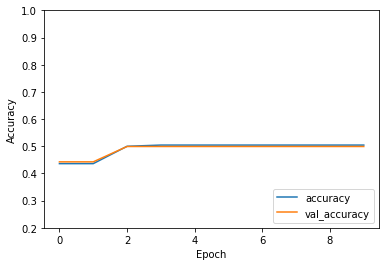

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

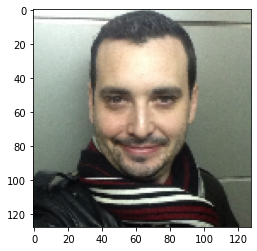

In [ ]:
image_path = validation_data[7]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (128, 128)) / 255.0
plt.imshow(image)
plt.show()

In [ ]:
image = np.expand_dims(image, 0)
prediction = model.predict(image)

In [ ]:
index = np.argmax(prediction)
decoding = {0:'f', 1:'m', 2:'u'}

print('[+] prediction is :', decoding[index]) 

[+] prediction is : f
